<a href="https://colab.research.google.com/github/KA18202005/ML--Learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


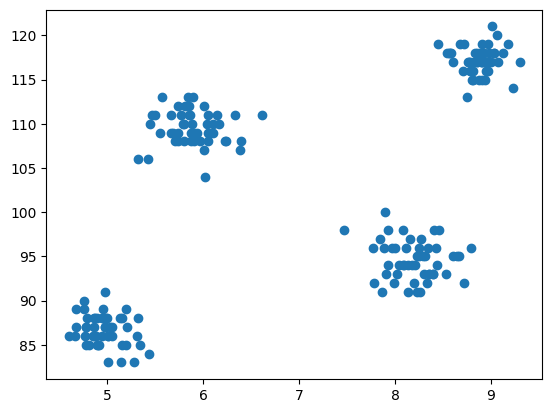

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit(df)
  wcss.append(km.inertia_)

In [6]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 514.1616803171117,
 427.9627769877217,
 295.4391895943191,
 243.39979752014634,
 210.82442088683615,
 178.0926476607581]

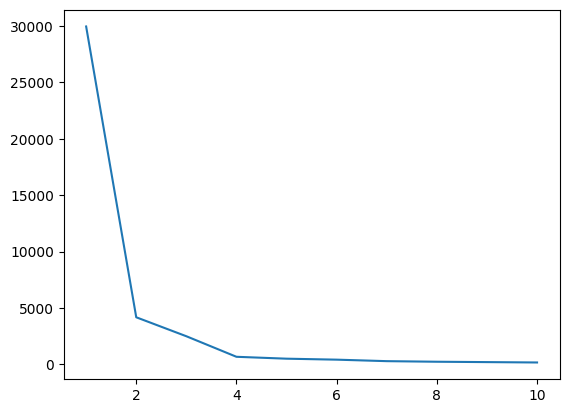

In [7]:
plt.plot(range(1, 11), wcss)

In [8]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [9]:
y_means

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0], dtype=int32)

In [10]:
X[y_means == 3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

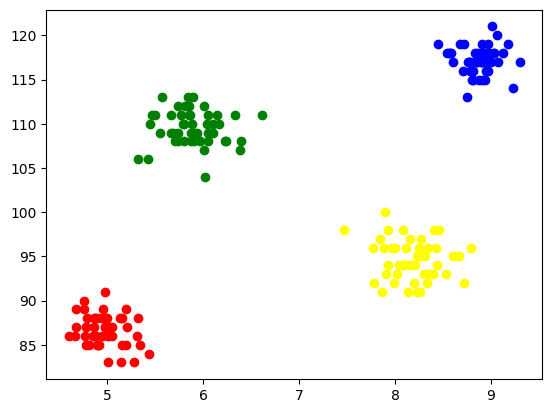

In [11]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

In [12]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [13]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [14]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [15]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

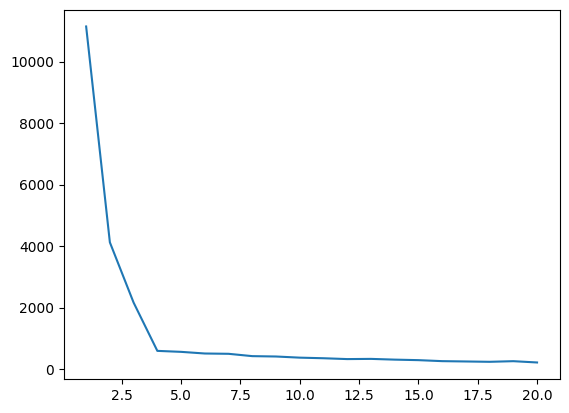

In [16]:
plt.plot(range(1,21),wcss)

In [17]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [18]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [19]:
df

,col1,col2,col3,label
0,4.334245,3.325804,-4.174970,1
1,-3.322467,3.221711,-4.625342,3
2,-6.072969,-4.134592,2.698461,2
3,6.904659,6.111057,-4.340950,1
4,-2.608392,2.950156,-2.234665,3
...,...,...,...,...
195,4.712692,5.680070,-5.319802,1
196,-4.137450,6.458603,-3.351356,3
197,-5.208894,-4.413377,5.838983,2
198,2.619422,-2.779098,5.622849,0


In [20]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()